## Prediction of possibility of working based on years after graduation, field of study, number of connections (in LinkedIn), work specialization, school

In [175]:
%matplotlib inline
from matplotlib import pyplot as plt

#### Learning Algorithm: Gaussian Naive Bayes

In [176]:

import pandas as pd

data = pd.read_csv('philippine_file.csv')
data.head()


,educations-end_date,educations-field_of_study,num-connections,industry-specialization,educations-school-name_asnumeric,positions_is_current
0,1,8,0,4,10,0
1,2,8,3,5,10,1
2,27,5,36,3,9,0
3,20,0,0,0,4,1
4,12,8,5,4,9,0


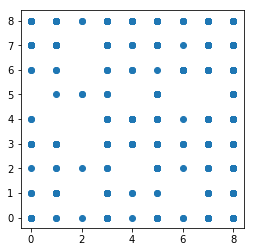

In [182]:
fig = plt.figure(figsize=(4,4))
plt.scatter(data["educations-field_of_study"], data["industry-specialization"])
plt.show()

In [184]:
fig = plt.figure(figsize=(15,8))
plt.hist(data["educations-school-name_asnumeric"].count(data["positions_is_current"] == 1), bins=20)
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'levels'

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['educations-field_of_study', 'num-connections', 'industry-specialization', 'educations-school-name_asnumeric', 'educations-end_date']], data[['positions_is_current']], test_size=0.3, random_state=427)

y_train = y_train.values.flatten() # Just some trivial data formatting..
y_test = y_test.values.flatten()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_score = gnb.predict(X_test)
y_score

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0,

In [167]:
gnb.predict_proba(X_test)

array([[ 0.78566388,  0.21433612],
       [ 0.63414584,  0.36585416],
       [ 0.68519154,  0.31480846],
       ..., 
       [ 0.60681779,  0.39318221],
       [ 0.69235689,  0.30764311],
       [ 0.84086439,  0.15913561]])

In [168]:
from sklearn import datasets, metrics
classification = ["True", "False"]
print(metrics.classification_report(y_test, y_score, target_names=classification, digits=4))
pred = gnb.predict(X_test)
print(metrics.confusion_matrix(pred, y_test))

             precision    recall  f1-score   support

       True     0.8000    0.9687    0.8763       479
      False     0.3478    0.0645    0.1088       124

avg / total     0.7070    0.7828    0.7185       603

[[464 116]
 [ 15   8]]


#### Learning Algorithm: Support Vector Machines

In [135]:
import numpy as np
from sklearn import svm
import math
import pandas as pd
from sklearn import datasets, metrics

filedata = 'philippine_file.csv'
data = pd.read_csv(filedata)
data.columns.values

n = len(data)
num_train = int(0.70*n)

data = data.sample(frac=1).reset_index(drop=True)
classes = data["positions_is_current"]

y = data["positions_is_current"][:num_train]
y_test = data["positions_is_current"][num_train:]
del data["positions_is_current"]
X = data[:num_train]
X_test = data[num_train:]

model = svm.SVC(kernel="sigmoid", gamma=0.01, coef0=1)
#model = svm.SVC(kernel='linear',C=15).fit(X,y)
#model = svm.SVC(kernel='poly',C=1, degree=2, probability=True).fit(X,y)
#model = svm.SVC(kernel='rbf',C=100, gamma=4).fit(X,y)

model.fit(X, y)
pred = model.predict(X_test)
print(metrics.confusion_matrix(pred, y_test))
print(model.score(X_test,y_test))
trial = data.head(1)
print(model.predict(trial))
print("test input(class): ", classes[1])
print("test input(data): ")
data.head(1)
len(data)

[[470 133]
 [  0   0]]
0.77943615257
[0]
test input(class):  0
test input(data): 


2007

#### Learning Algorithm: Artificial Neural Network

In [127]:
import pandas as pd

data = pd.read_csv('philippine_file.csv')

In [128]:
x = data.drop('positions_is_current',axis=1) #axis=1 tells the translator that a column will be dropped, 0 if row
y = data['positions_is_current']
y

0       0
1       1
2       0
3       1
4       0
5       1
6       0
7       0
8       0
9       1
10      0
11      1
12      0
13      1
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      1
22      1
23      0
24      0
25      0
26      0
27      1
28      0
29      0
       ..
1977    0
1978    0
1979    1
1980    0
1981    1
1982    1
1983    0
1984    0
1985    1
1986    0
1987    1
1988    0
1989    1
1990    0
1991    0
1992    0
1993    0
1994    0
1995    1
1996    1
1997    0
1998    0
1999    1
2000    0
2001    0
2002    0
2003    0
2004    0
2005    1
2006    1
Name: positions_is_current, Length: 2007, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()#StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[ 0.25      ,  0.125     ,  0.104     ,  0.875     ,  0.5       ],
       [ 0.69230769,  1.        ,  0.012     ,  0.375     ,  1.        ],
       [ 0.23076923,  1.        ,  0.464     ,  0.        ,  1.        ],
       ..., 
       [ 0.59615385,  1.        ,  0.64      ,  0.375     ,  1.        ],
       [ 0.25      ,  1.        ,  0.128     ,  0.        ,  0.9       ],
       [ 0.26923077,  0.125     ,  0.01      ,  0.875     ,  1.        ]])

In [130]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=5000,learning_rate_init=0.01,activation='tanh')
mlp.fit(x_train,y_train)

predictions = mlp.predict(x_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [131]:
from sklearn.metrics import classification_report,confusion_matrix

print (confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[392   0]
 [110   0]]
             precision    recall  f1-score   support

          0       0.78      1.00      0.88       392
          1       0.00      0.00      0.00       110

avg / total       0.61      0.78      0.68       502



/Users/zenitharnejo/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Prediction of work specialization based on field of study, school, year after graduation, educations-end_date

#### Learning Algorithm: Multinomial Naive Bayes

In [80]:
import pandas as pd

data = pd.read_csv('philippine_file.csv')
data.head()

,educations-end_date,educations-field_of_study,num-connections,industry-specialization,educations-school-name_asnumeric,positions_is_current
0,1,8,0,4,10,0
1,2,8,3,5,10,1
2,27,5,36,3,9,0
3,20,0,0,0,4,1
4,12,8,5,4,9,0


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['educations-field_of_study', 'educations-school-name_asnumeric', 'educations-end_date']], data[['industry-specialization']], test_size=0.3, random_state=427)

y_train = y_train.values.flatten() # Just some trivial data formatting..
y_test = y_test.values.flatten()
X_train = X_train.values.flatten() # Just some trivial data formatting..
X_test = X_test.values.flatten()

print("X_train ", X_train.shape)
print("y_train ", y_train.shape)



X_train  (4212,)
y_train  (1404,)


In [82]:
# Importing packages necessary for building the model
from sklearn.feature_extraction.text import CountVectorizer #converts the content to vector
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline #vectorize then multinomialNB; as in a pipelined steps

text_clf = Pipeline([('vect_tfid', CountVectorizer()),
                     ('clf', MultinomialNB())]) #alpha automatically signals laplace correction, include alpha as parameter

##text_clf = text_clf.fit(X_train, y_train) #fit the model to the training set


In [83]:
#text_clf is the generated model
# y_predicted = text_clf.predict(X_test) #get predicted classes
# y_predicted

#### Learning Algorithm: Support Vector Machines (SVM)

In [156]:
import pandas as pd
from sklearn import preprocessing

filedata = 'philippine_file.csv'
data = pd.read_csv(filedata)

del data["num-connections"]
del data["positions_is_current"]
del data["educations-end_date"]

n = len(data)
num_train = int(0.6*n)

data = data.sample(frac=1).reset_index(drop=True)
classes = data["industry-specialization"]

y = data["industry-specialization"][:num_train]
y_test = data["industry-specialization"][num_train:]
del data["industry-specialization"]

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)

X = data[:num_train]
X_test = data[num_train:]

model = svm.SVC(kernel="sigmoid", gamma=0.3, coef0=3).fit(X,y)
#model = svm.SVC(kernel='linear',C=100).fit(X,y)
#model = svm.SVC(kernel='poly',C=200, degree=2, probability=True).fit(X,y)
#model = svm.SVC(kernel='rbf',C=100, gamma=5, ).fit(X,y)

pred = model.predict(X_test)
print(metrics.confusion_matrix(pred, y_test))
print(model.score(X_test,y_test))
trial = data.head(1)
print(model.predict(trial))
print("test input(class): ", classes[1])

[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [ 98  34  41 164  26  31  59  95 255]]
0.317559153176
[8]
test input(class):  8


/Users/zenitharnejo/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


#### Learning Algorithm: Artificial Neural Network

In [100]:
import pandas as pd

data = pd.read_csv('philippine_file.csv')

#del data["num-connections"]
del data["positions_is_current"]

x = data.drop('industry-specialization',axis=1) #axis=1 tells the translator that a column will be dropped, 0 if row
y = data['industry-specialization']

In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()#StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[ 0.52727273,  1.        ,  0.        ,  1.        ],
       [ 0.30909091,  1.        ,  0.004     ,  1.        ],
       [ 0.43636364,  0.375     ,  0.028     ,  1.        ],
       ..., 
       [ 0.83636364,  0.        ,  0.002     ,  1.        ],
       [ 0.18181818,  1.        ,  0.112     ,  1.        ],
       [ 0.29090909,  0.375     ,  0.144     ,  1.        ]])

In [102]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 5),max_iter=5000,learning_rate_init=0.01,activation='logistic')
mlp.fit(x_train,y_train)

predictions = mlp.predict(x_test)
print(predictions)

[8 8 8 8 8 3 8 8 8 8 8 8 8 8 8 8 8 1 8 8 3 8 8 8 8 0 0 8 8 8 8 8 8 8 8 8 3
 8 8 8 0 8 3 8 8 8 8 8 8 8 8 8 8 8 8 8 3 8 8 3 0 8 8 0 8 8 8 8 8 8 8 3 8 3
 3 8 8 8 8 8 8 8 8 3 8 8 8 8 3 8 3 3 8 8 8 8 3 8 8 8 8 8 3 0 8 8 3 3 8 8 8
 3 8 8 8 3 0 8 8 8 0 8 3 8 0 8 8 8 8 8 8 8 8 8 3 8 8 8 8 8 8 8 8 8 3 8 3 8
 0 8 8 8 3 8 8 8 3 8 8 3 3 8 8 8 8 8 8 8 8 3 3 8 8 8 0 8 3 8 3 8 8 8 3 3 3
 8 8 8 0 3 3 8 8 8 3 8 0 8 8 8 8 3 8 8 3 8 3 8 8 8 8 8 8 8 8 8 3 8 8 8 8 8
 8 8 3 3 3 3 8 8 3 8 8 0 8 8 3 8 8 8 3 3 8 8 0 3 8 3 8 8 8 8 8 8 8 8 3 8 8
 8 8 0 8 8 3 8 8 8 8 8 8 8 8 1 8 8 0 8 8 8 3 8 8 8 8 3 8 8 3 8 8 8 8 8 8 3
 3 8 8 8 8 8 3 8 8 3 8 8 3 8 8 8 8 0 8 3 8 8 0 8 3 8 8 3 3 8 8 8 8 8 0 3 8
 8 8 8 3 3 8 8 8 8 8 8 8 8 8 8 8 8 3 8 8 8 8 3 8 8 8 3 3 8 8 8 8 8 8 8 8 8
 8 8 3 8 3 0 8 8 8 8 8 3 8 3 8 8 8 8 8 8 8 8 8 3 8 8 8 8 8 3 8 8 3 3 8 8 8
 8 8 8 8 8 8 8 8 3 0 8 8 8 8 8 3 8 8 8 3 3 8 8 3 8 8 8 8 8 8 8 8 8 8 0 8 8
 8 3 8 3 8 8 8 8 3 8 8 8 3 8 0 8 8 8 8 8 8 3 8 8 3 3 3 8 8 8 8 8 8 8 0 8 8
 8 8 8 3 8 0 8 8 3 8 8 8 

In [103]:
from sklearn.metrics import classification_report,confusion_matrix

print (confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 14   0   0   2   0   0   0   0  36]
 [  1   2   0   2   0   0   0   0  23]
 [  1   0   0   3   0   0   0   0  17]
 [  2   0   0  57   0   0   0   0  58]
 [  1   0   0   7   0   0   0   0  18]
 [  0   0   0   2   0   0   0   0  16]
 [  0   0   0   1   0   0   0   0  22]
 [  3   0   0   6   0   0   0   0  51]
 [  5   0   0  17   0   0   0   0 135]]
             precision    recall  f1-score   support

          0       0.52      0.27      0.35        52
          1       1.00      0.07      0.13        28
          2       0.00      0.00      0.00        21
          3       0.59      0.49      0.53       117
          4       0.00      0.00      0.00        26
          5       0.00      0.00      0.00        18
          6       0.00      0.00      0.00        23
          7       0.00      0.00      0.00        60
          8       0.36      0.86      0.51       157

avg / total       0.36      0.41      0.33       502



/Users/zenitharnejo/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
